In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Numerical Methods to Find Roots

1. Bisection Method
2. Regula Falsi Method
3. Secant Method
4. Newton Ramphson Method
5. Brent's Method
6. Halley's Method
7. Muller's Method

### 1. Bisection Method

In [2]:
def bisection_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    print(f"Initial interval: a = {a}, b = {b}")

    print('value taken for a:',value_a)
    print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')

    iterations = []
    values = []

    for i in range(max_iter):
        c = (a+b)/2.0
        iterations.append(i)
        values.append(c)

        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values

In [3]:
f = lambda x: x**3 - 2*x - 5
root, iterations, values = bisection_method(f)
print("Root found:", root)
print('Iterations:', len(iterations))

Initial interval: a = 2, b = 3
value taken for a: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2]
value taken for b: [3, 4, 5, 6, 7, 8, 9, 10]
Root found: 2.0945520401000977
Iterations: 20


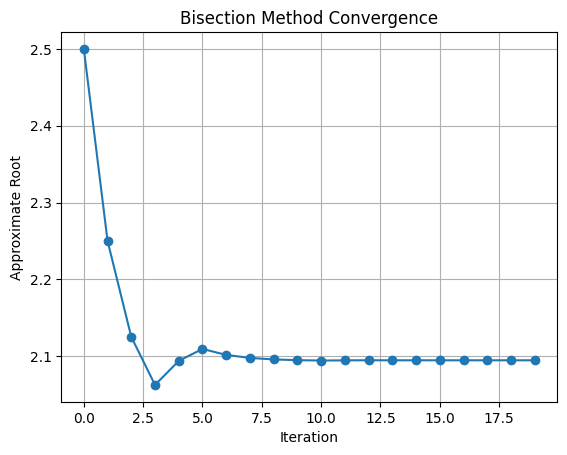

In [4]:
import matplotlib.pyplot as plt

plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Bisection Method Convergence')
plt.grid()
plt.show()

### 2. Regula Falsi Method

In [5]:
def regula_falsi_method(f,max_iter=100, tol=1e-6):

    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    
    print(f"Initial interval: a = {a}, b = {b}")
    print('value taken for a:',value_a)
    print('value taken for b:',value_b)

        
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')
    
    iterations = []
    values = []

    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        iterations.append(i)
        values.append(c)
        
        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values
        

In [6]:
f = lambda x: x**3 - 2*x - 5
root, iterations, values = regula_falsi_method(f)
print("Root found:", root)
print('Iterations:', len(iterations))

Initial interval: a = 2, b = 3
value taken for a: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2]
value taken for b: [3, 4, 5, 6, 7, 8, 9, 10]
Root found: 2.0945513981181274
Iterations: 14


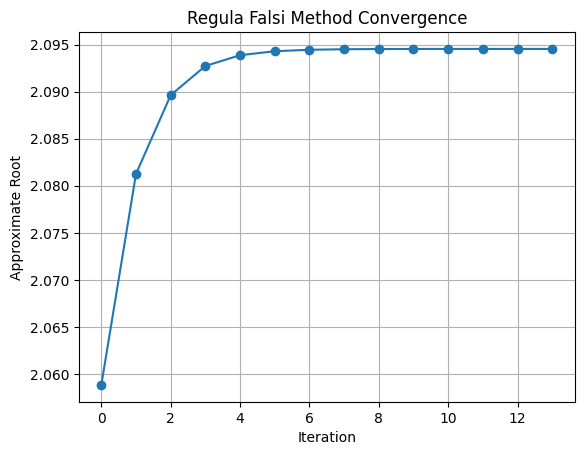

In [7]:
plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Regula Falsi Method Convergence')
plt.grid()
plt.show()

### 3. Secant Method

Unlike Regula Falsi, the Secant Method does not require f(a) and f(b) to have opposite signs.

In [8]:
import random

def secant_method(f, max_iter=100, tol=1e-6):
    iterations = []
    values = []
    
    a = random.randint(-5, 5)
    b = random.randint(-5, 5)
    
    while a == b:  
        b = random.randint(-10, 10)
    print('a: ', a)
    print('b: ', b)
    
    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        
        if abs(f(b)) < tol:
            return b, iterations, values 

        iterations.append(i)
        values.append(c)

        if abs(c - b) < tol:
            return c, iterations, values

        a = b
        b = c

    return c, iterations, values  

In [9]:
f = lambda x: x**3 - 2*x - 5
root, iterations, values = secant_method(f)
print("Root found:", root)
print('Iterations:', len(iterations))

a:  -3
b:  -2
Root found: 2.094551475998905
Iterations: 12


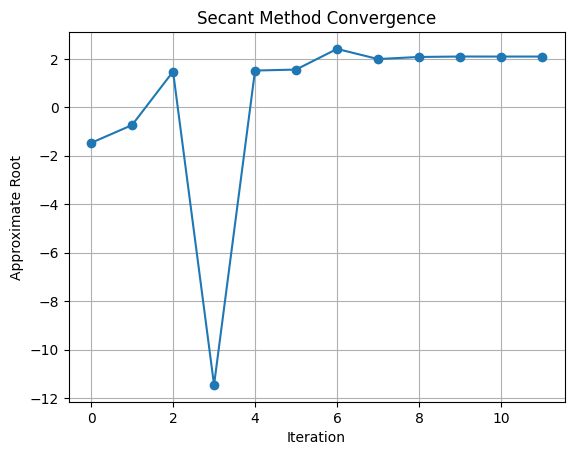

In [10]:
plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Secant Method Convergence')
plt.grid()
plt.show()

### 4. Newton Ramphson Method

In [11]:
from sympy import symbols, diff, lambdify

def newton_raphson_method(f, max_iter=100, tol=1e-6):
    # differentiating the f(x)
    x = symbols('x')  
    f_prime = diff(f, x) 
    # Converting the symbolic functions to numerical functions
    f = lambdify(x, f, "numpy")
    df = lambdify(x, f_prime, "numpy")

    best_x0 = None
    best_f_value = float('inf')

    for _ in range(10):
        x0_candidate = random.randint(-5, 5)
        while x0_candidate ==0: 
            x0_candidate = random.randint(-5, 5)
        f_value = abs(f(x0_candidate))

        if f_value < best_f_value:
            best_f_value = f_value
            best_x0 = x0_candidate

    x0 = best_x0
    print(f"Best initial x0: {x0}")

    iterations = []
    values = []

    for i in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        if abs(df_x0) < 1e-10:
            raise ValueError("Derivative too close to zero, Newton-Raphson may not converge.")

        x_n = x0 - f_x0 / df_x0
        iterations.append(i)
        values.append(x_n)

        if abs(x_n - x0) < tol: 
            return x_n, iterations, values

        x0 = x_n 

    return x0, iterations, values 

In [12]:
x = symbols('x')
f = x**3 - 2*x - 5
root, iterations, values = newton_raphson_method(f)
print(f"Root found: {root}")
print(f"Iterations taken: {len(iterations)}")

Best initial x0: -1
Root found: 2.0945514815423474
Iterations taken: 6


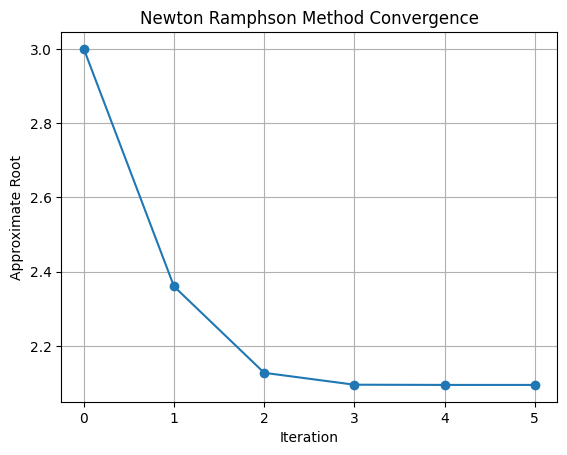

In [13]:
plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Newton Ramphson Method Convergence')
plt.grid()
plt.show()

### 5. Brent's Method

reference: https://en.wikipedia.org/wiki/Brent%27s_method#:~:text=If%20f(bk)%2C,)%20%2F%204%20and%20bk.

In [14]:
def brent_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    b = min(value_b)  
    a = max(value_a)
    
    print(f"Initial interval: a = {a}, b = {b}")
    print('value taken for a:',value_a)
    print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError("The values must be one negative and one positive.")

    c, d = a, a  # Additional points for interpolation
    fa, fb, fc = f(a), f(b), f(a)
    s = b
    mflag = True  # Tracking to use bisection or not

    iterations = []
    values = []
    
    for i in range(max_iter):
        
        # Using Inverse Quadratic Interpolation
        if f(a) != f(c) and f(b) != f(c): 
            s = (a * f(b) * f(c)) / ((f(a) - f(b)) * (f(a) - f(c))) + \
                (b * f(a) * f(c)) / ((f(b) - f(a)) * (f(b) - f(c))) + \
                (c * f(a) * f(b)) / ((f(c) - f(a)) * (f(c) - f(b)))
            s_name = 'Inverse'
            
        # Use Secant Method
        else:
            s = b - (f(b) * (b - a)) / (f(b) - f(a))
            s_name = 'Secant'

        cond1 = (s < (3 * a + b) / 4 or s > b)
        cond2 = mflag and abs(s - b) >= abs(b - c) / 2
        cond3 = not mflag and abs(s - b) >= abs(c - d) / 2
        cond4 = mflag and abs(b - c) < tol
        cond5 = not mflag and abs(c - d) < tol
        
        # Bisection
        if cond1 or cond2 or cond3 or cond4 or cond5:
            s = (a + b) / 2  
            mflag = True
            s_name = 'Bisection'
        else:
            mflag = False

        values.append(s)
        iterations.append(i)
        print(f'the methods used in step: {i} is {s_name}')
        fs = f(s)
        d, c = c, b
        fc = fb
        if f(a) * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        if abs(fb) < tol:
            return b, iterations, values  
            
    return b, iterations, values

In [15]:
f = lambda x: x**3 - 2*x - 5
root, iterations, values = brent_method(f)
print(f"Root found: {root}")
print(f'Values: ', values)
print(f'Iterations: {len(iterations)}')# 2.0945514815423474

Initial interval: a = 2, b = 3
value taken for a: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2]
value taken for b: [3, 4, 5, 6, 7, 8, 9, 10]
the methods used in step: 0 is Bisection
the methods used in step: 1 is Bisection
the methods used in step: 2 is Bisection
the methods used in step: 3 is Secant
the methods used in step: 4 is Bisection
the methods used in step: 5 is Bisection
the methods used in step: 6 is Bisection
the methods used in step: 7 is Bisection
the methods used in step: 8 is Secant
the methods used in step: 9 is Bisection
the methods used in step: 10 is Bisection
the methods used in step: 11 is Bisection
the methods used in step: 12 is Bisection
the methods used in step: 13 is Bisection
the methods used in step: 14 is Bisection
the methods used in step: 15 is Bisection
the methods used in step: 16 is Bisection
the methods used in step: 17 is Bisection
the methods used in step: 18 is Bisection
Root found: 2.0945514955020554
Values:  [2.5, 2.25, 2.125, 2.09288824383

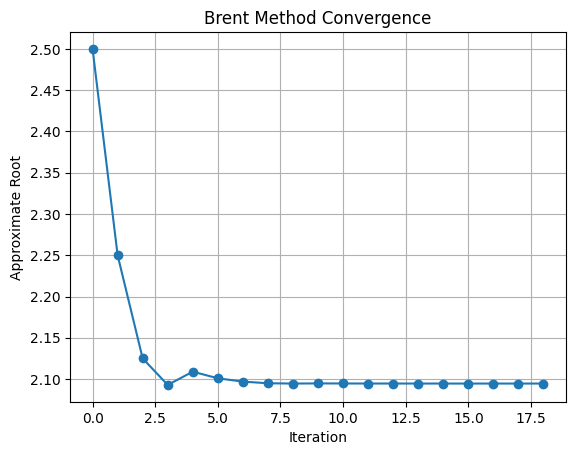

In [16]:
plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Brent Method Convergence')
plt.grid()
plt.show()

### 6. Halley's Method

Halley’s method is an extension of Newton-Raphson's method, using the second derivative to achieve cubic convergence (which is even faster than Newton’s quadratic convergence).

In [17]:
def halley_method(f, tol=1e-6, max_iter=100):
    x = symbols('x')
    
    f_prime = diff(f, x)   
    f_double_prime = diff(f_prime, x)  

    f_numeric = lambdify(x, f, 'numpy')
    f_prime_numeric = lambdify(x, f_prime, 'numpy')
    f_double_prime_numeric = lambdify(x, f_double_prime, 'numpy')

    best_x0 = None
    best_f_value = float('inf')
    
    for i in range(-10, 11): 
        f_val = abs(f_numeric(i))
        if f_val < best_f_value:
            best_f_value = f_val
            best_x0 = i

    x_n = best_x0 
    print(f"Initial guess x0: {x_n}")

    iterations = []
    values = []

    for i in range(max_iter):
        fx_n = f_numeric(x_n)
        fpx_n = f_prime_numeric(x_n)
        fppx_n = f_double_prime_numeric(x_n)

        iterations.append(i)
        values.append(x_n)

        if abs(fx_n) < tol:
            return x_n, iterations, values 

        denominator = 2 * fpx_n**2 - fx_n * fppx_n
        if abs(denominator) < 1e-12: 
            raise ValueError("Halley's method failed: near zero second derivative.")

        x_next = x_n - (2 * fx_n * fpx_n) / denominator
        
        if abs(x_next - x_n) < tol:
            return x_next, iterations, values

        x_n = x_next

    return x_n, iterations, values

In [18]:
x = symbols('x')
f = x**3 - 2*x - 5
root, iterations, values = halley_method(f)
print(f"Root found: {root}")
print(f'Iterations: {len(iterations)}')

Initial guess x0: 2
Root found: 2.0945514815401642
Iterations: 3


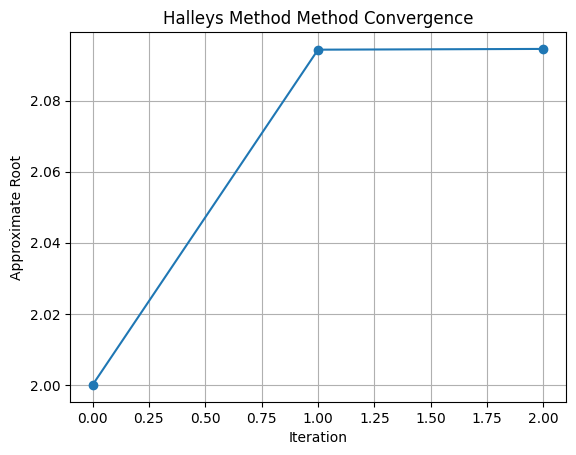

In [19]:
plt.plot(iterations, values, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Approximate Root')
plt.title('Halleys Method Method Convergence')
plt.grid()
plt.show()

### 7. Müller’s Method